In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Raw data with multiple seeds
raw_data = {
    'p2d0': {
        'seed1': {'name_desc': 0.00, 'desc_name': 99.67},
        'seed2': {'name_desc': 0.00, 'desc_name': 98.67},
        'seed3': {'name_desc': 0.00, 'desc_name': 99.67}
    },
    'p2d10': {
        'seed1': {'name_desc': 1.00, 'desc_name': 98.67},
        'seed2': {'name_desc': 0.33, 'desc_name': 96.00}
    },
    'p2d20': {
        'seed1': {'name_desc': 3.00, 'desc_name': 96.00},
        'seed2': {'name_desc': 2.33, 'desc_name': 96.33}
    },
    'p2d30': {
        'seed1': {'name_desc': 6.00, 'desc_name': 95.00},
        'seed2': {'name_desc': 5.77, 'desc_name': 94.67}
    },
    'p2d40': {
        'seed1': {'name_desc': 11.33, 'desc_name': 90.33},
        'seed2': {'name_desc': 11.33, 'desc_name': 88.33}
    },
    'p2d50': {
        'seed1': {'name_desc': 10.33, 'desc_name': 76.33},
        'seed2': {'name_desc': 19.33, 'desc_name': 82.67},
        'seed3': {'name_desc': 11.33, 'desc_name': 72.33}
    },
    'p2d60': {
        'seed1': {'name_desc': 22.00, 'desc_name': 45.33},
        'seed2': {'name_desc': 25.33, 'desc_name': 46.90}
    },
    'p2d75': {
        'seed1': {'name_desc': 42.33, 'desc_name': 21.33},
        'seed2': {'name_desc': 37.00, 'desc_name': 21.67}
    },
    'p2d80': {
        'seed1': {'name_desc': 42.00, 'desc_name': 15.67},
        'seed2': {'name_desc': 46.00, 'desc_name': 12.00}
    },
    'p2d90': {
        'seed1': {'name_desc': 51.00, 'desc_name': 4.00},
        'seed2': {'name_desc': 53.33, 'desc_name': 2.33}
    },
    'p2d100': {
        'seed1': {'name_desc': 63.00, 'desc_name': 0.00},
        'seed2': {'name_desc': 62.67, 'desc_name': 0.00},
        'seed3': {'name_desc': 60.67, 'desc_name': 0.00}
    }
}

# Calculate mean and std for each dataset
processed_data = []
for dataset, seeds_data in raw_data.items():
    # Extract p2d ratio from dataset name
    p2d_ratio = int(dataset.replace('p2d', ''))

    # Collect values across seeds
    name_desc_values = [seed_data['name_desc'] for seed_data in seeds_data.values()]
    desc_name_values = [seed_data['desc_name'] for seed_data in seeds_data.values()]

    # Calculate statistics
    processed_data.append({
        'dataset': dataset,
        'p2d_ratio': p2d_ratio,
        'name_desc_mean': np.mean(name_desc_values),
        'name_desc_std': np.std(name_desc_values, ddof=1) if len(name_desc_values) > 1 else 0,
        'desc_name_mean': np.mean(desc_name_values),
        'desc_name_std': np.std(desc_name_values, ddof=1) if len(desc_name_values) > 1 else 0,
        'num_seeds': len(seeds_data)
    })

df = pd.DataFrame(processed_data)

# Format the output for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Table 1: sorted by p2d_ratio
df_p2d_sorted = df.sort_values('p2d_ratio')
print("=== Results sorted by p2d ratio ===")
print("Dataset  P2D% | Name→Desc (Mean±Std) | Desc→Name (Mean±Std) | #Seeds")
print("-" * 65)
for _, row in df_p2d_sorted.iterrows():
    print(f"{row['dataset']:<8} {row['p2d_ratio']:3d}  | "
          f"{row['name_desc_mean']:6.2f}±{row['name_desc_std']:5.2f}     | "
          f"{row['desc_name_mean']:6.2f}±{row['desc_name_std']:5.2f}     | "
          f"{row['num_seeds']:2d}")

# Table 2: sorted by desc→name accuracy
df_desc_sorted = df.sort_values('desc_name_mean')
print("\n=== Results sorted by desc→name accuracy ===")
print("Dataset  P2D% | Name→Desc (Mean±Std) | Desc→Name (Mean±Std) | #Seeds")
print("-" * 65)
for _, row in df_desc_sorted.iterrows():
    print(f"{row['dataset']:<8} {row['p2d_ratio']:3d}  | "
          f"{row['name_desc_mean']:6.2f}±{row['name_desc_std']:5.2f}     | "
          f"{row['desc_name_mean']:6.2f}±{row['desc_name_std']:5.2f}     | "
          f"{row['num_seeds']:2d}")


=== Results sorted by p2d ratio ===
Dataset  P2D% | Name→Desc (Mean±Std) | Desc→Name (Mean±Std) | #Seeds
-----------------------------------------------------------------
p2d0       0  |   0.00± 0.00     |  99.34± 0.58     |  3
p2d10     10  |   0.67± 0.47     |  97.34± 1.89     |  2
p2d20     20  |   2.67± 0.47     |  96.16± 0.23     |  2
p2d30     30  |   5.88± 0.16     |  94.84± 0.23     |  2
p2d40     40  |  11.33± 0.00     |  89.33± 1.41     |  2
p2d50     50  |  13.66± 4.93     |  77.11± 5.21     |  3
p2d60     60  |  23.66± 2.35     |  46.11± 1.11     |  2
p2d75     75  |  39.66± 3.77     |  21.50± 0.24     |  2
p2d80     80  |  44.00± 2.83     |  13.84± 2.60     |  2
p2d90     90  |  52.16± 1.65     |   3.17± 1.18     |  2
p2d100   100  |  62.11± 1.26     |   0.00± 0.00     |  3

=== Results sorted by desc→name accuracy ===
Dataset  P2D% | Name→Desc (Mean±Std) | Desc→Name (Mean±Std) | #Seeds
-----------------------------------------------------------------
p2d100   100  |  62.1

In [21]:
from matplotlib import font_manager

#  Register the Times font
font_path = '/content/times.ttf'  # Default upload path in Colab
font_prop = font_manager.FontProperties(fname=font_path)

# Add the font to matplotlib's font manager
font_manager.fontManager.addfont(font_path)
font_name = font_prop.get_name()
print(font_name)

# Set the font globally for the plot
plt.rcParams['font.family'] = font_name

# Set larger font size globally
plt.rcParams['font.size'] = 16  # Base font size
plt.rcParams['axes.titlesize'] = 20  # Title size
plt.rcParams['axes.labelsize'] = 18  # Axis labels size
plt.rcParams['xtick.labelsize'] = 14  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick labels
plt.rcParams['legend.fontsize'] = 16  # Legend size

Times New Roman


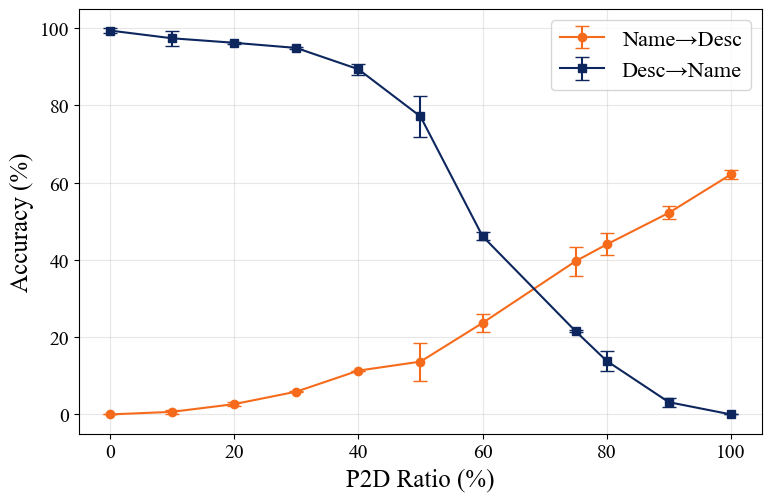


=== Summary Statistics ===
        Metric  Value
Mean Name→Desc  23.26
Mean Desc→Name  58.07
 Std Name→Desc   1.63
 Std Desc→Name   1.34

=== Results saved to multi_seed_results.csv ===


In [30]:
# Create visualization
plt.figure(figsize=(8, 5.3))

# Plot: P2D ratio vs accuracies
plt.errorbar(df_p2d_sorted['p2d_ratio'], df_p2d_sorted['name_desc_mean'],
            yerr=df_p2d_sorted['name_desc_std'], label='Name→Desc',
            marker='o', capsize=5, color='#f56b1b')
plt.errorbar(df_p2d_sorted['p2d_ratio'], df_p2d_sorted['desc_name_mean'],
            yerr=df_p2d_sorted['desc_name_std'], label='Desc→Name',
            marker='s', capsize=5, color='#0d275e')
plt.xlabel('P2D Ratio (%)')
plt.ylabel('Accuracy (%)')
# plt.title('Accuracy vs P2D Training Ratio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('accuracy_vs_p2d.png', dpi=300)

plt.show()

# Summary statistics table
print("\n=== Summary Statistics ===")
summary_stats = pd.DataFrame({
    'Metric': ['Mean Name→Desc', 'Mean Desc→Name', 'Std Name→Desc', 'Std Desc→Name'],
    'Value': [
        df['name_desc_mean'].mean(),
        df['desc_name_mean'].mean(),
        df['name_desc_std'].mean(),
        df['desc_name_std'].mean()
    ]
})
print(summary_stats.to_string(index=False))

df_export = df_p2d_sorted[['dataset', 'p2d_ratio', 'name_desc_mean', 'name_desc_std',
                          'desc_name_mean', 'desc_name_std', 'num_seeds']]
df_export.to_csv('multi_seed_results.csv', index=False)
print("\n=== Results saved to multi_seed_results.csv ===")